In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\james\OneDrive\Documents\DATA ANALYST PORTFOLIO\Python Projects\Homicide Data Analysis\Dataset\homicide_by_countries.csv")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [7]:
df.shape

(195, 6)

In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [9]:
#check the data types

df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [10]:
#convert data type for rate

df['Rate'] = df['Rate'].astype(int)

In [12]:
#show the converted data types

df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int64
Year          int64
dtype: object

In [32]:
df['Region'].replace('Americas', 'N/S America', inplace = True)

In [33]:
#extracting columns that we will use for visualization

df1 = df.sort_values('Count', ascending = False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,N/S America,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,N/S America,Central America,28,36579,2020
186,United States,N/S America,Northern America,6,21570,2020
162,South Africa,Africa,Southern Africa,33,19846,2020
118,Myanmar,Asia,South-Eastern Asia,28,15299,2021
41,Colombia,N/S America,South America,22,11520,2020
143,Russia,Europe,Eastern Europe,7,10697,2020
190,Venezuela,N/S America,South America,36,10598,2018


In [34]:
#Extracting the first 5 rows we will use for visualization

df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1['Perc'] = (df1['Count'] *100 / df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


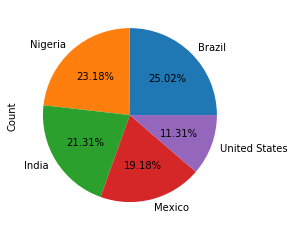

In [35]:
#Visualizing the extracted data in a pie chart

df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [36]:
#Total count of homicide people by region

df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

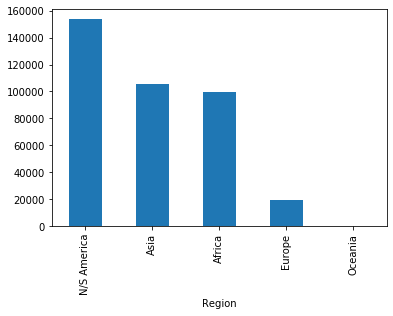

In [38]:
df2.plot(kind = 'bar')
plt.show

In [39]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
5,Anguilla,N/S America,Caribbean,28,4,2014
6,Antigua and Barbuda,N/S America,Caribbean,9,9,2020
7,Argentina,N/S America,South America,5,2416,2020
8,Armenia,Asia,Western Asia,1,52,2020
9,Aruba,N/S America,Caribbean,1,2,2014


In [41]:
#Group dataframe by subregion

df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [43]:
#Generate index

df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [44]:
#Generate Values

df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

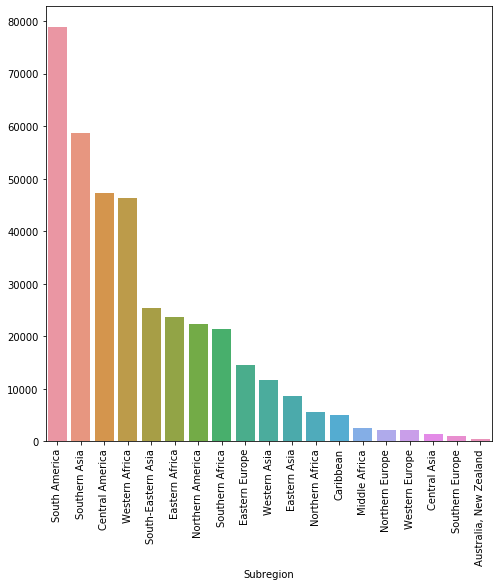

In [80]:
#Plot the data in a bar plot using seaborn

sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabel = None
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 6,6


In [81]:
df.Year.value_counts()

2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2021     1
2008     1
2007     1
Name: Year, dtype: int64

In [83]:
#Count of Asia and Europe over years

df4 = df[df['Region'].isin(['Asia', 'Europe'])]

In [85]:
df4 = df4[df4['Year']> 2016][['Region', 'Year', 'Count']]

In [86]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
12,Asia,2020,230
14,Asia,2019,2
15,Asia,2018,3830
17,Europe,2019,225
18,Europe,2017,193


In [87]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [90]:
#Convert the data to rows and columns

df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [92]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

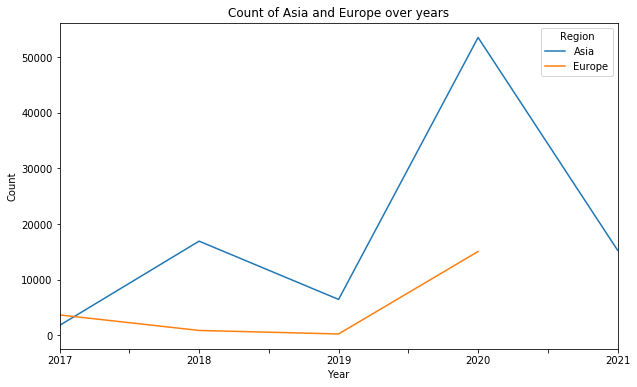

In [98]:
#Plot Count of Asia and Europe over years in line graph

df_unstacked.plot(kind = 'line', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over years')
plt.show()

In [100]:
#Sum of rate values by each year

df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

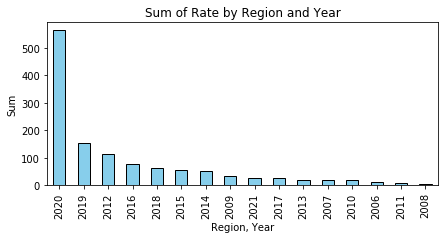

In [102]:
#Visualize Sum of Rate by Region and Year in bar chart

df5.plot(kind = 'bar', figsize = (7,3), color = 'skyblue', edgecolor = 'black')
plt.xlabel('Region, Year')
plt.ylabel('Sum')
plt.title('Sum of Rate by Region and Year')
plt.show()

In [104]:
#Sum of count values for each specific year within each region

df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False).head(40)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

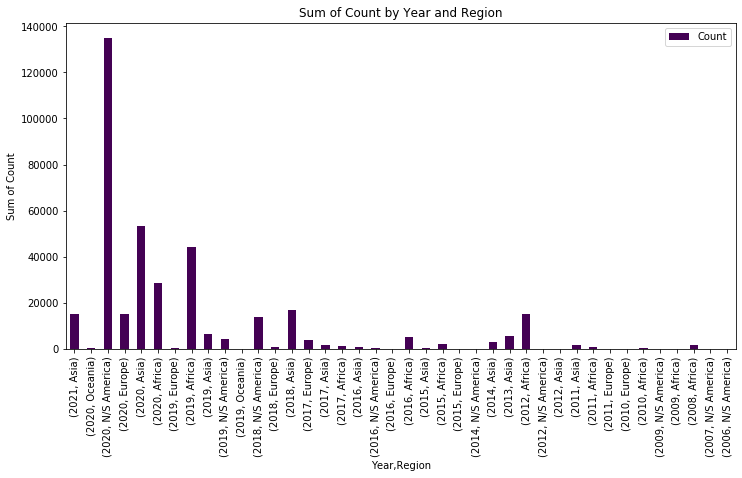

In [108]:
#Visualize Sum of Count by year and Region in bar chat

df6.plot(kind = 'bar', figsize = (12,6), colormap = 'viridis')
plt.xlabel('Year,Region')
plt.ylabel('Sum of Count')
plt.title('Sum of Count by Year and Region')
plt.show()

In [110]:
#Group the dataframe by Subregion column

df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [111]:
#Generate index

df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [112]:
#Generate Values

df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [113]:
#Create the Dataframe

data = {
    'Category':df7.index,
    'Value' :df7.values,
    'Info' : df7.values
}
df = pd.DataFrame(data)
df

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [120]:
#Visualize the data in a Treemap

fig = px.treemap(df, path = ['Category'], values = 'Value', title = 'Treemap')
fig.update_traces(hovertemplate = 'Category: %{label}<br>Value: %{value}')
fig.show()